# Diabetes disease analysis and prediction system

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Cleansing

#### Listing Null Values form data

In [3]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Diabetes Stats

In [7]:
d=df['diabetes'].value_counts()
print(d)
No_Disease = len(df[df['diabetes'] ==0])
Diseased = len(df[df['diabetes'] ==1])

print('Percentage of No_Disease: {:.2f} %' .format(No_Disease/len(df['diabetes'])*100))
print('Percentage of Diseased: {:.2f} %' .format(Diseased/len(df['diabetes'])*100))

diabetes
0    91500
1     8500
Name: count, dtype: int64
Percentage of No_Disease: 91.50 %
Percentage of Diseased: 8.50 %


#### age Stats

In [8]:
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = round(df['age'].mean(),1)

print('Min age: %s' %min_age)
print('Max age: %s' %max_age)
print('Mean age: %s' %mean_age)

Min age: 0.08
Max age: 80.0
Mean age: 41.9


#### Sex Stats

In [10]:
female = len(df[df['gender'] =='Female'])
male = len(df[df['gender'] =='Male'])

print('Percentage of female: {:.2f} %' .format(female/len(df['gender'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(df['gender'])*100))

Percentage of female: 58.55 %
Percentage of male: 41.43 %


# Data Visualization

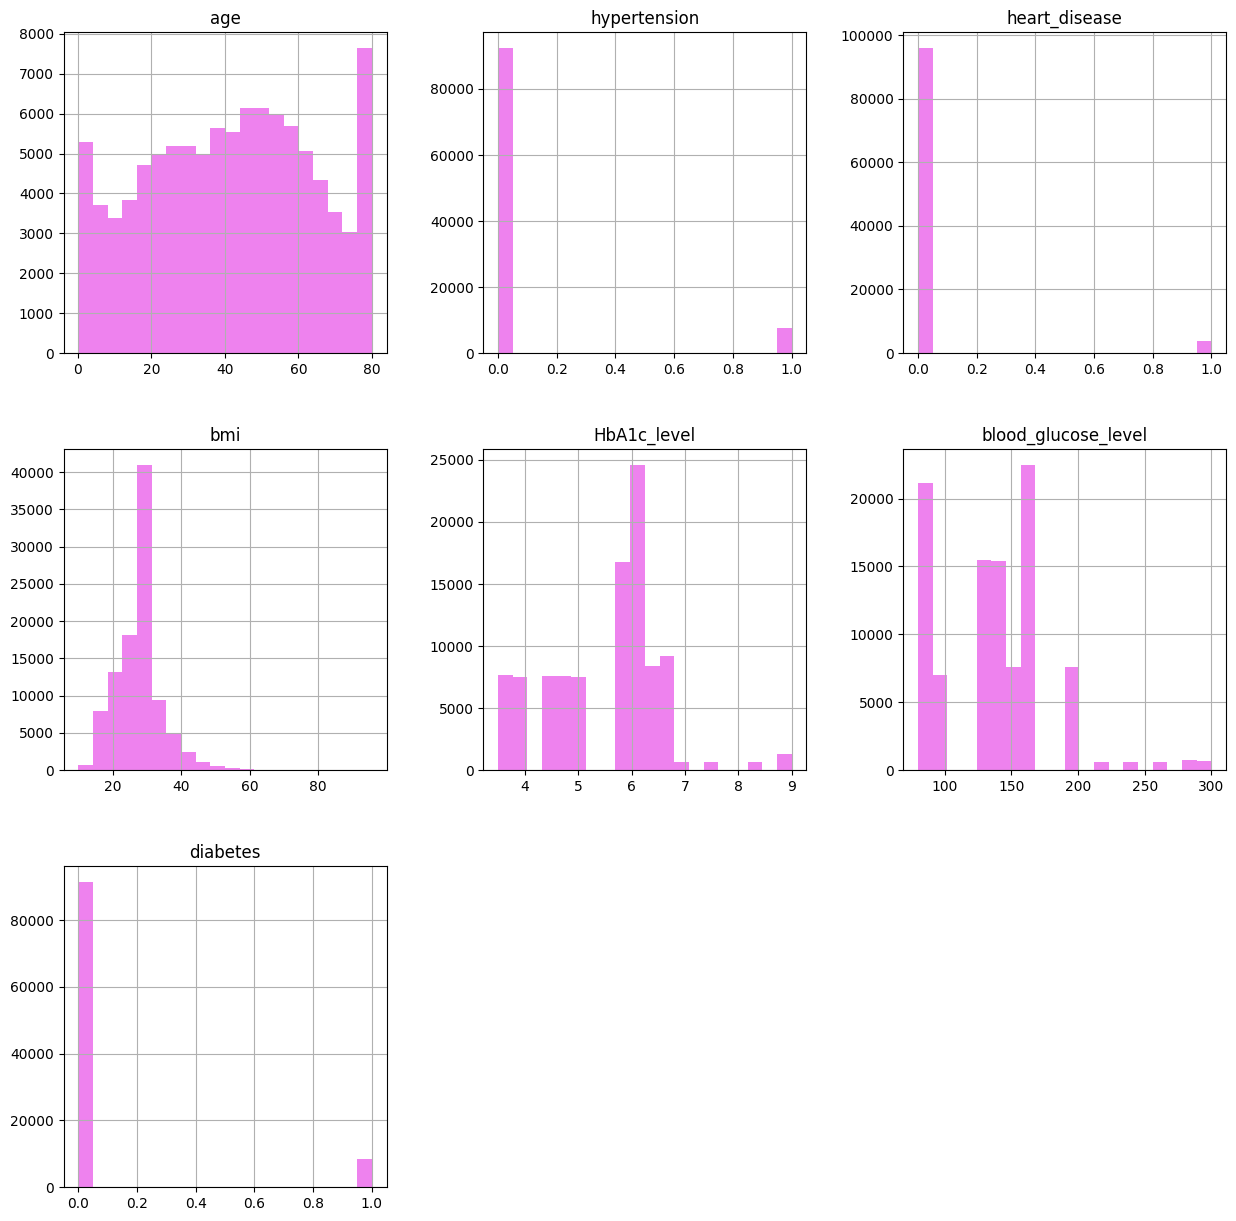

In [11]:
df.hist(bins=20,figsize=(15,15),grid=True,ec='black',color='violet')
plt.show()

<Figure size 1500x1200 with 0 Axes>

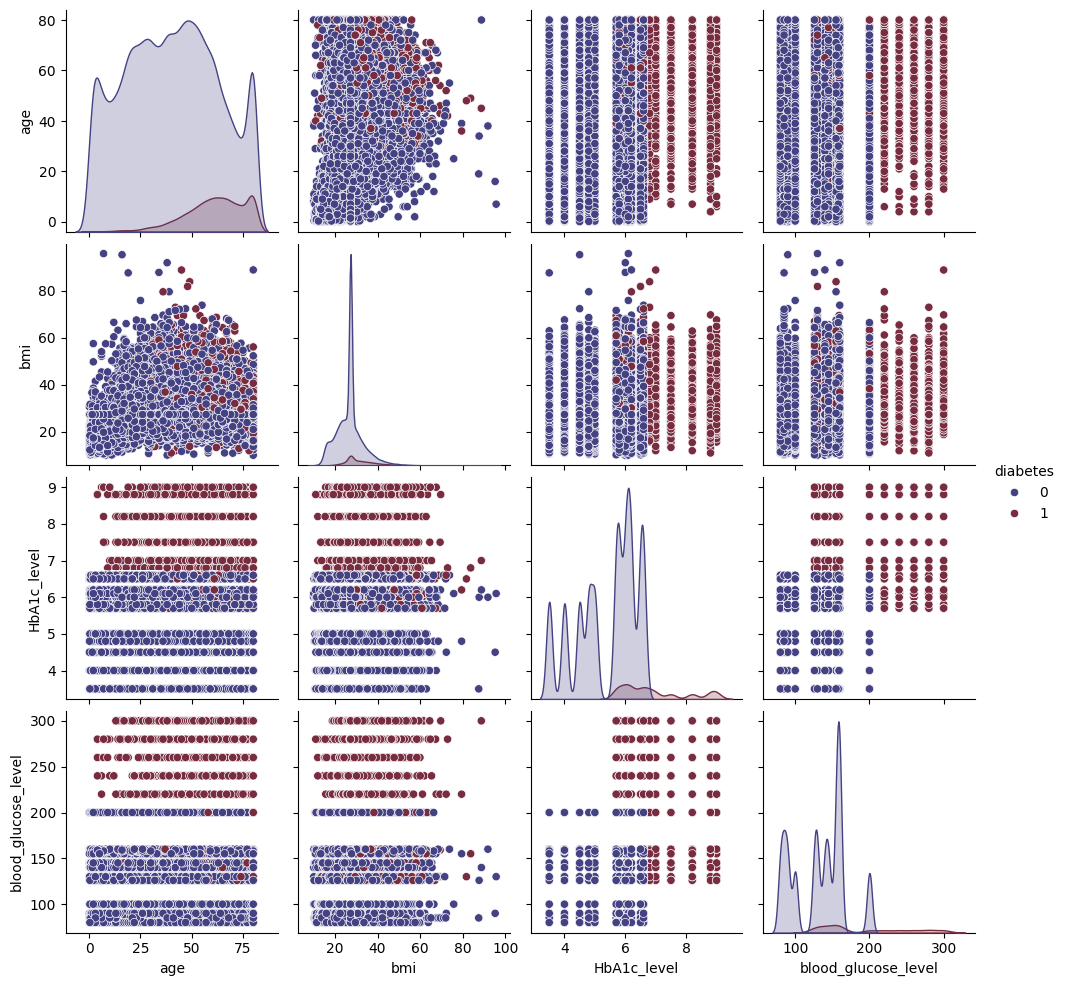

In [12]:
plt.figure(figsize=(15, 12))
sns.pairplot(
    df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']],
    hue='diabetes',
    palette='icefire'
)
plt.show()

##### diabetes Diseases Ratio in Dataset
###### Blue Graph indicate no diabetes desease and Orange Graph show diabetes desease

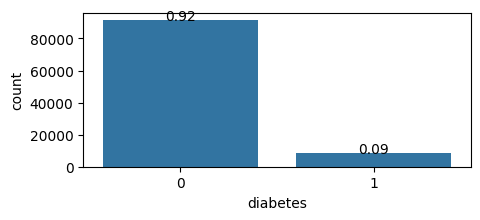

In [13]:
def plotDiabetes():
    sns.countplot(x='diabetes', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count = df['diabetes'].value_counts().values[i]
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height() + 3
        label = '{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y, label, ha='center')

fig_diabetes, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotDiabetes()

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


##### Select Age as most dependent data on label
###### Disease Probability Bar Plot

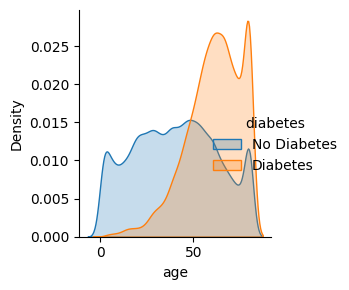

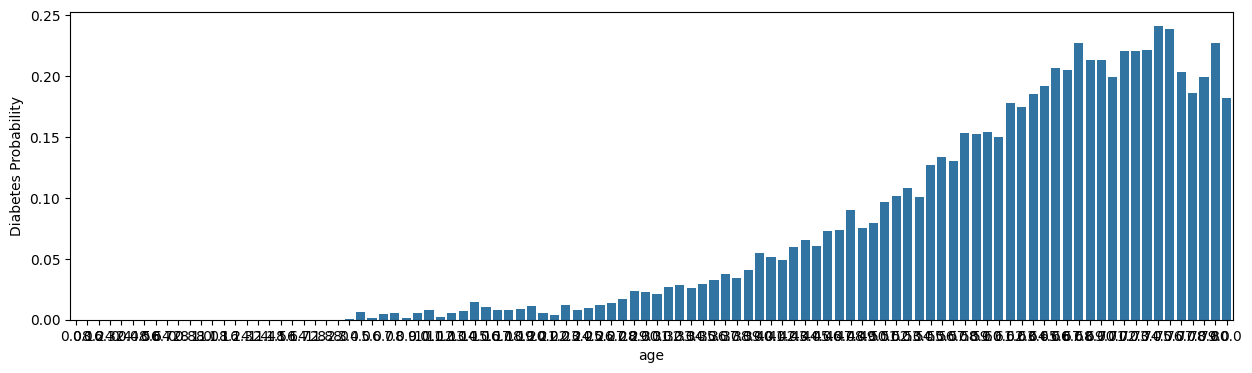

In [16]:
def plotAge():
    # KDE Plot with FacetGrid
    facet_grid = sns.FacetGrid(df, hue='diabetes')
    facet_grid.map(sns.kdeplot, "age", fill=True)  # use fill instead of shade
    facet_grid.add_legend()  # ensures legend is available

    # Rename legend labels safely
    legend_labels = ['No Diabetes', 'Diabetes']
    for t, l in zip(facet_grid._legend.texts, legend_labels):
        t.set_text(l)

    facet_grid.set_axis_labels('age', 'Density')

    # Barplot of average diabetes probability vs age
    avg = df[["age", "diabetes"]].groupby(['age'], as_index=False).mean()
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x='age', y='diabetes', data=avg, ax=ax)
    ax.set(xlabel='age', ylabel='Diabetes Probability')

plotAge()

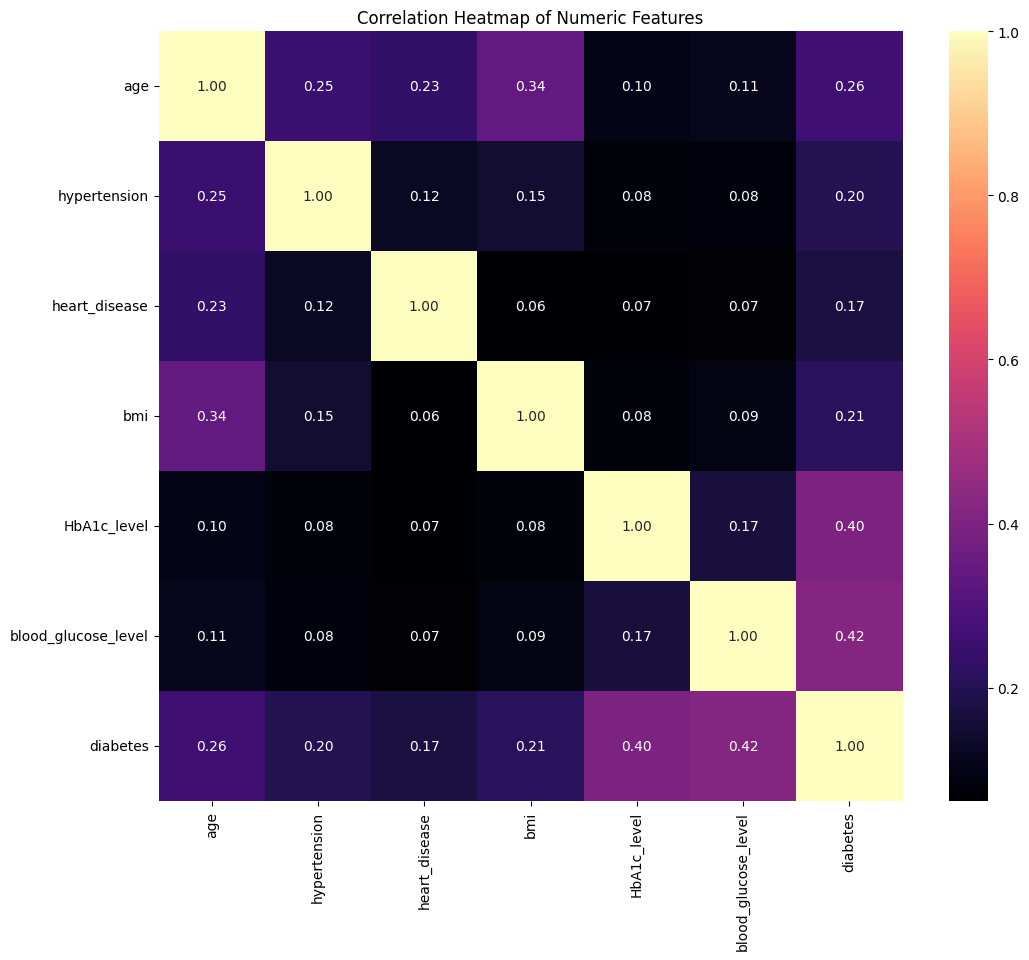

In [17]:
plt.figure(figsize=(12, 10))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="magma", fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### Checking For Categorical Data

In [18]:
x = df['gender']
x.value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [19]:
x = df['smoking_history']
x.value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [20]:
category = [
    ('gender', ['Female', 'Male', 'Other']),
    ('smoking_history', ['No Info', 'never', 'former', 'current', 'not current', 'ever'])
]

continuous = [
    ('age', 'Age in years'),
    ('bmi', 'Body Mass Index'),
    ('HbA1c_level', 'HbA1c level'),
    ('blood_glucose_level', 'Blood Glucose Level')
]


In [24]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='diabetes', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'diabetes']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='diabetes', hue=attribute, data=avg, ax=axes[ax_index][2])

    # Update legend labels only if legend exists
    if axes[ax_index][1].get_legend() is not None:
        for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
            t.set_text(l)

    if axes[ax_index][2].get_legend() is not None:
        for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
            t.set_text(l)

In [25]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]


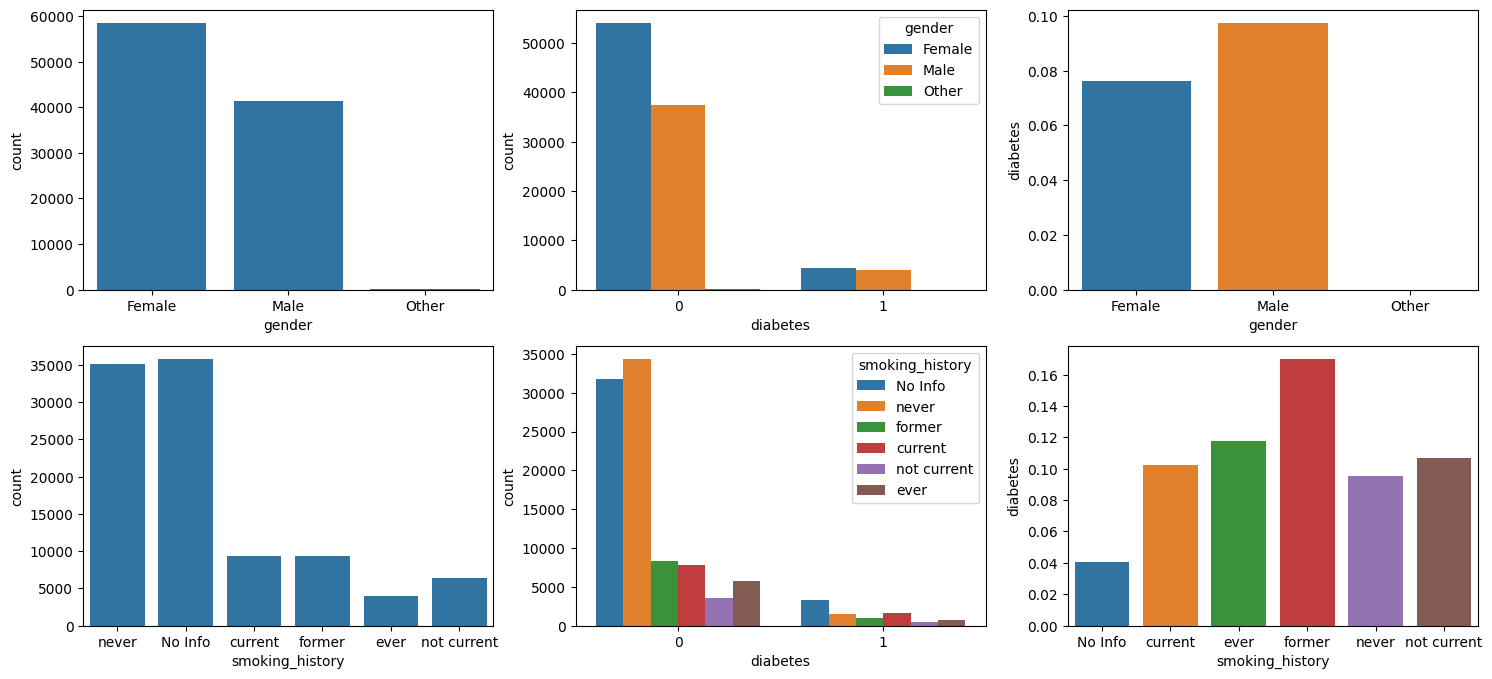

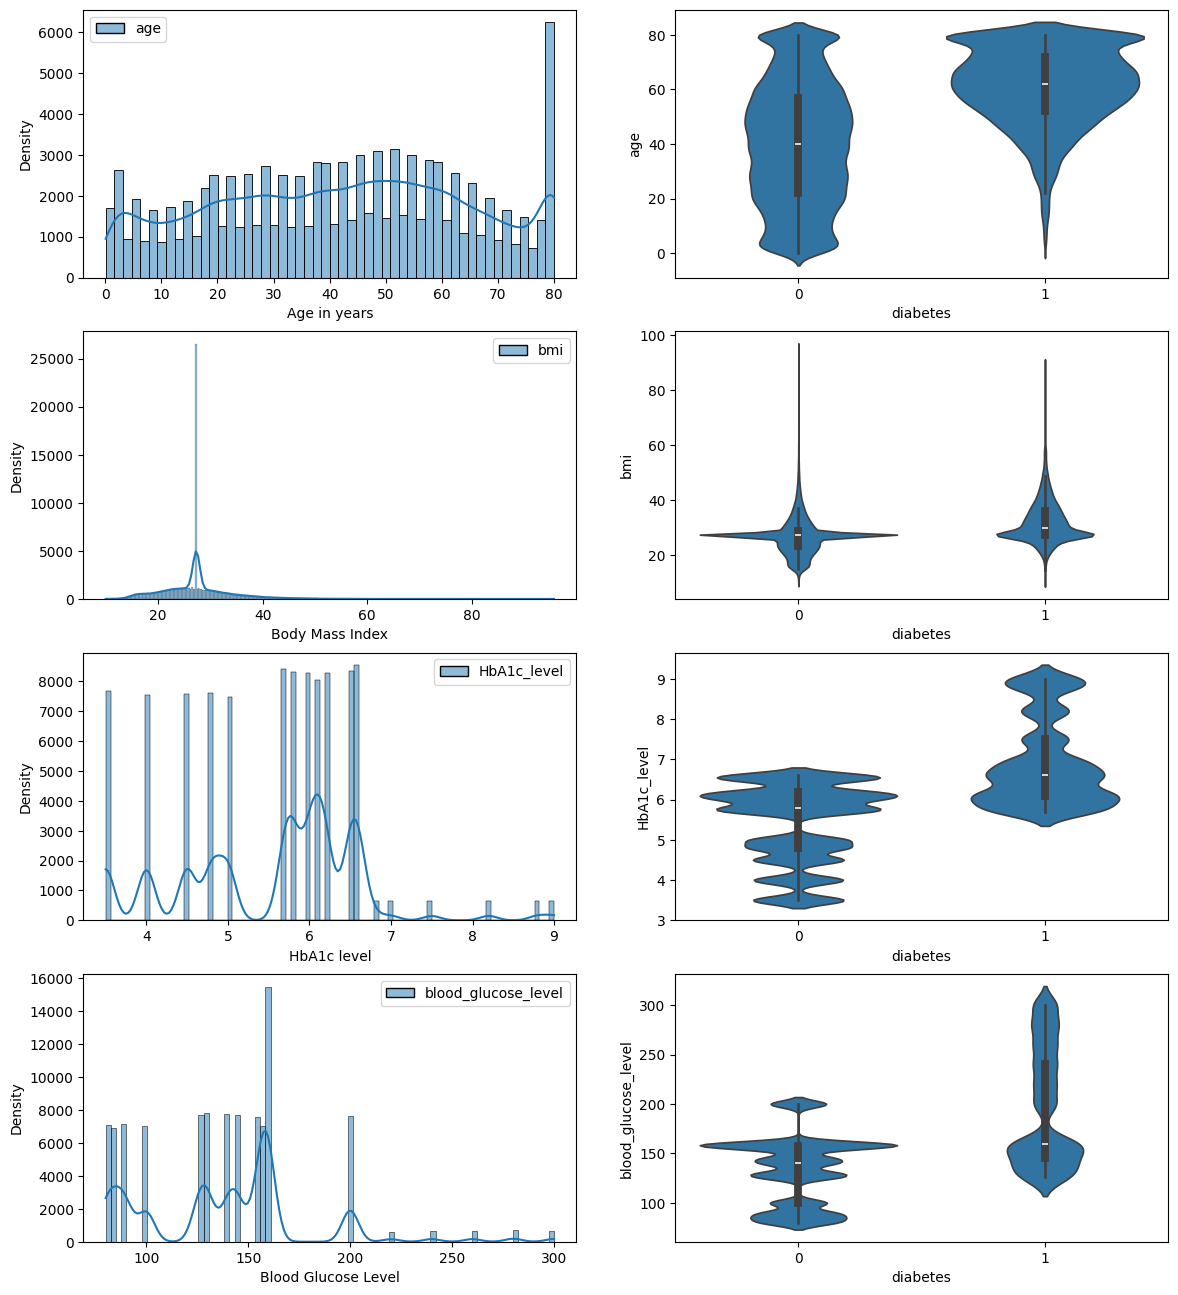

In [26]:
import matplotlib.pyplot as plt

# For categorical features (2 rows, 3 cols to leave space)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
plotGrid(isCategorial=True)

# For continuous features (4 rows, 2 cols)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
plotGrid(isCategorial=False)


##### Creating Dummy

In [27]:
# Create dummy variables for 'gender'
gender_dummy = pd.get_dummies(df['gender'])
gender_dummy.rename(columns={'Female': 'Gender_Female', 'Male': 'Gender_Male', 'Other': 'Gender_Other'}, inplace=True)

# Create dummy variables for 'smoking_history'
smoke_dummy = pd.get_dummies(df['smoking_history'])
smoke_dummy.rename(columns={
    'never': 'Smoke_Never',
    'former': 'Smoke_Former',
    'current': 'Smoke_Current',
    'No Info': 'Smoke_NoInfo',
    'not current': 'Smoke_NotCurrent',
    'ever': 'Smoke_Ever'
}, inplace=True)

# Concatenate the dummy variables into the dataframe
df = pd.concat([df, gender_dummy, smoke_dummy], axis=1)

# Drop original columns after encoding
df.drop(['gender', 'smoking_history'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
 7   Gender_Female        100000 non-null  bool   
 8   Gender_Male          100000 non-null  bool   
 9   Gender_Other         100000 non-null  bool   
 10  Smoke_NoInfo         100000 non-null  bool   
 11  Smoke_Current        100000 non-null  bool   
 12  Smoke_Ever           100000 non-null  bool   
 13  Smoke_Former         100000 non-null  bool   
 14  Smoke_Never          100000 non-null  bool   
 15  Smoke_NotCurrent  

In [29]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_Female,Gender_Male,Gender_Other,Smoke_NoInfo,Smoke_Current,Smoke_Ever,Smoke_Former,Smoke_Never,Smoke_NotCurrent
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


In [30]:
df_X= df.loc[:, df.columns != 'diabetes']
df_y= df.loc[:, df.columns == 'diabetes']

# Model Training

In [31]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings

# Assuming df_X contains features and df_y contains the target variable
selected_features = []
lr = LogisticRegression()
n_features_to_select = 20  # Define the number of features to select

rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select)

warnings.simplefilter('ignore')
rfe.fit(df_X.values, df_y.values)
print(rfe.support_)
print(rfe.ranking_)

for i, feature in enumerate(df_X.columns.values):
    if rfe.support_[i]:
        selected_features.append(feature)

df_selected_X = df_X[selected_features]
df_selected_y = df_y

lm = sm.Logit(df_selected_y, df_selected_X)
result = lm.fit()

print(result.summary2())
warnings.simplefilter('ignore')

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df_selected_X,df_selected_y, test_size = 0.25, random_state =0)
columns = X_train.columns

##### Calculating Accuracy Function and confusion Matrix of the Models

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict):

    print("\nConfusion Matrix: \n",
    confusion_matrix(y_test, y_predict))

    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.3f}")

# Logistic Regression

In [34]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(f"Accuracy of Test Dataset: {lr.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train,y_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.960
Accuracy of Train Dataset: 0.960


##### Vale Prediction for Test dataset for Logistic Regression

Predicted values:
[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22678   217]
 [  791  1314]]

Accuracy : 95.968
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22895
           1       0.86      0.62      0.72      2105

    accuracy                           0.96     25000
   macro avg       0.91      0.81      0.85     25000
weighted avg       0.96      0.96      0.96     25000



<Axes: >

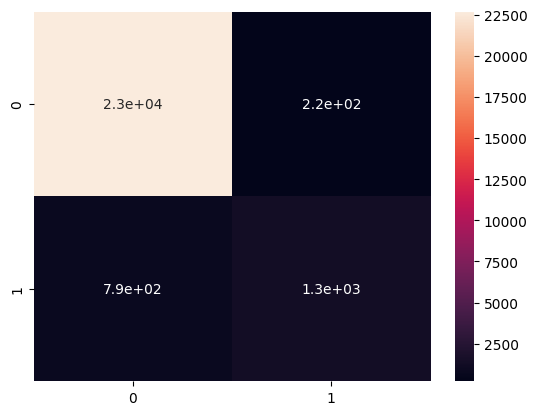

In [35]:
y_predict=lr.predict(X_test)
print("Predicted values:")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Support Vector Machine

In [36]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.960
Accuracy of Train Dataset: 0.960


##### Value Prediction for Test dataset for SVM

Predicted values:
[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22726   169]
 [  829  1276]]

Accuracy : 96.008
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.88      0.61      0.72      2105

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000



<Axes: >

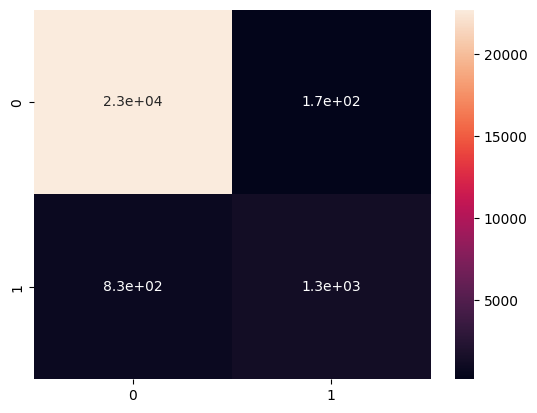

In [37]:
y_predict=svm_linear.predict(X_test)
print("Predicted values:")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {gini.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gini.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.972
Accuracy of Train Dataset: 0.972


##### Value Prediction for Test dataset for Decision Tree

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22895     0]
 [  700  1405]]

Accuracy : 97.200
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       1.00      0.67      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.99      0.83      0.89     25000
weighted avg       0.97      0.97      0.97     25000



<Axes: >

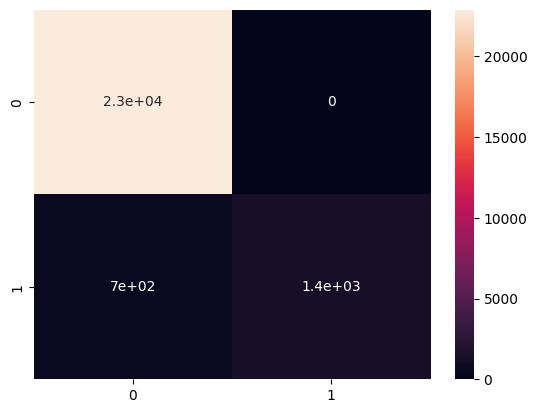

In [39]:
y_predict=gini.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Desicion Tree Diagram

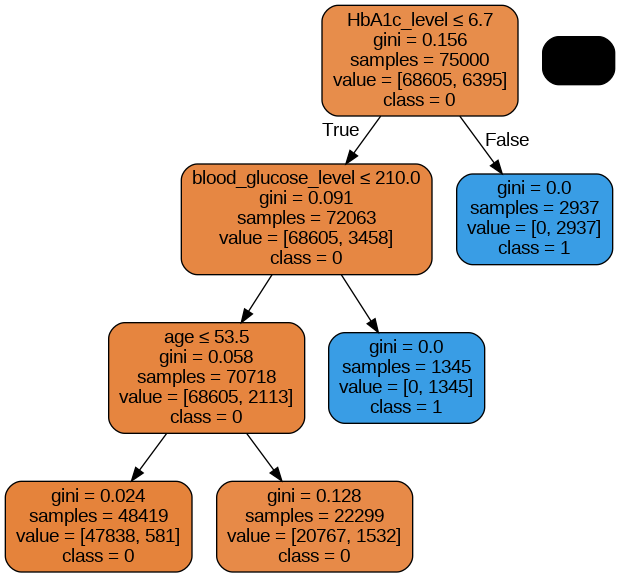

In [40]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_test.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart-disease-analysis-prediction.png')
Image(graph.create_png())

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.971
Accuracy of Train Dataset: 0.999


##### Over Fitting Issue
##### Vale Prediction for Test dataset for Rondom Forest

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22821    74]
 [  661  1444]]

Accuracy : 97.060
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.95      0.69      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



<Axes: >

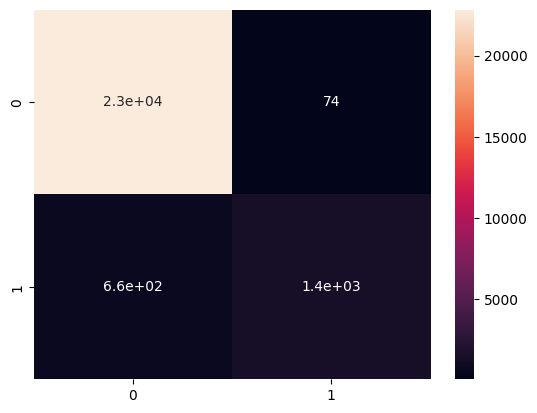

In [42]:
y_predict=forest.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {nb.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {nb.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.902
Accuracy of Train Dataset: 0.900


##### Vale Prediction for Test dataset for Naive Bayes

Predicted values:

[0 0 0 ... 0 0 1]

Confusion Matrix: 
 [[21855  1040]
 [ 1414   691]]

Accuracy : 90.184
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     22895
           1       0.40      0.33      0.36      2105

    accuracy                           0.90     25000
   macro avg       0.67      0.64      0.65     25000
weighted avg       0.89      0.90      0.90     25000



<Axes: >

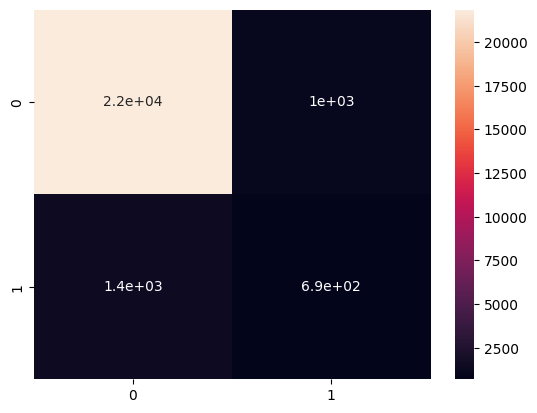

In [44]:
y_predict = nb.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# K Nearest Neighbor(KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
warnings.simplefilter('ignore')

In [46]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22767   128]
 [  837  1268]]

Accuracy : 96.140
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.91      0.60      0.72      2105

    accuracy                           0.96     25000
   macro avg       0.94      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000



<Axes: >

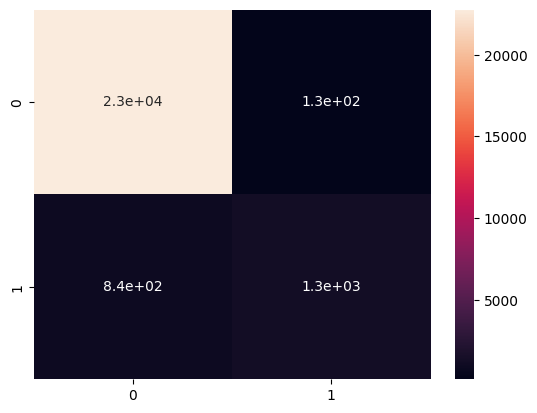

In [48]:
y_predict = classifier.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# XGBoost

In [47]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {XGB.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {XGB.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.971
Accuracy of Train Dataset: 0.977


Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22828    67]
 [  656  1449]]

Accuracy : 97.108
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.96      0.69      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



<Axes: >

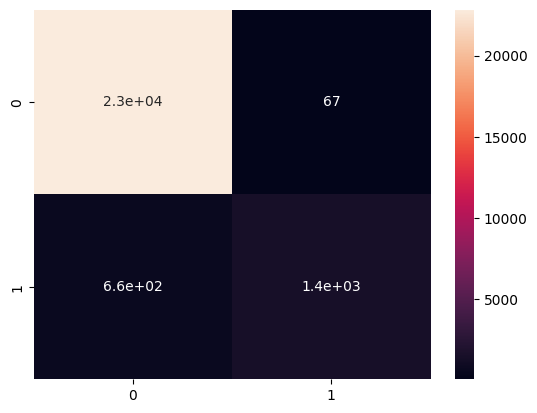

In [49]:
y_predict=XGB.predict(X_test)
print('Predicted values:\n')
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {ABC.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {ABC.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.971
Accuracy of Train Dataset: 0.971


Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[22812   654]
 [   83  1451]]

Accuracy : 97.052
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.95      0.69      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



<Axes: >

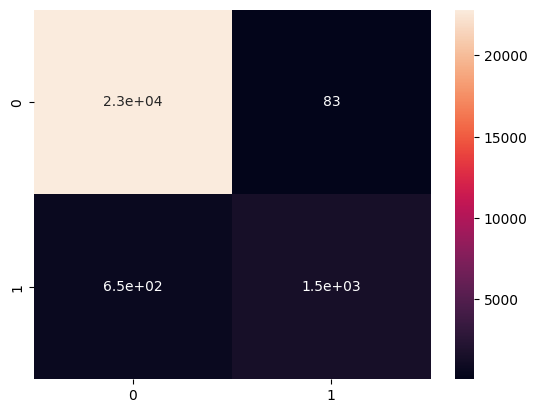

In [51]:
y_predict=ABC.predict(X_test)
print('Predicted values:\n')
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Artificial Neural Network (ANN)

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
ANN = Sequential(name='DCNN')
ANN.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))  # dynamically match input size
ANN.add(Dense(1, activation='sigmoid'))

ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
ANN.fit(X_train,y_train,epochs=250)

Epoch 1/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8769 - loss: 0.2970
Epoch 2/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9604 - loss: 0.1145
Epoch 3/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9602 - loss: 0.1145
Epoch 4/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9614 - loss: 0.1112
Epoch 5/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9618 - loss: 0.1109
Epoch 6/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9619 - loss: 0.1101
Epoch 7/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.9615 - loss: 0.1091
Epoch 8/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9632 - loss: 0.1093
Epoch 9/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9629 - loss: 0.1088
Epoch 10/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9627 - loss: 0.1082
Epoch 11/250
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9626 - loss: 0.1089
Epoch 12/250


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted values:

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

<Axes: >

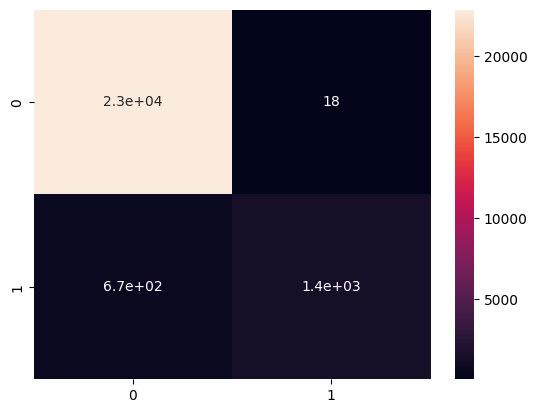

In [57]:
y_predict=ANN.predict(X_test)
print('Predicted values:\n')
rounded = [round(x[0]) for x in y_predict]
y_predict=rounded
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Cross Validation For Models

In [ ]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10)
models=[('Logistic Regression', lr), ('Support Vector Machine', svm_linear), ('Decision Tree', gini),
        ('Random Forest', forest), ('K Nearest Neighbor', classifier),('XGBoost',XGB),('AdaBoostClassifier', ABC)]
warnings.simplefilter('ignore')

for model in models:
    results=model_selection.cross_val_score(model[1],X_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of  {model[0]}: {results.mean():.3f}")

Cross validated Accuracy of  Logistic Regression: 0.960
Cross validated Accuracy of  Support Vector Machine: 0.961
Cross validated Accuracy of  Decision Tree: 0.972


In [ ]:
models=pd.DataFrame({'Model':['Logistics Regression','Support Vector Machine','Decision Tree','Random Forest','Naive Bayes','K Nearest Neighbor','eXtreme Gradient Boosting','AdaBoost'],
                     'Traning Accuracy':[(lr.score(X_train,y_train)),svm_linear.score(X_train,y_train),gini.score(X_train,y_train),forest.score(X_train,y_train),nb.score(X_train,y_train),classifier.score(X_train,y_train),XGB.score(X_train,y_train),ABC.score(X_train,y_train)],
                     'Test Accuracy':[(lr.score(X_test,y_test)),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test),nb.score(X_test,y_test),classifier.score(X_test,y_test),XGB.score(X_test,y_test),ABC.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

In [ ]:
x=[lr.score(X_test,y_test),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test),nb.score(X_test,y_test),classifier.score(X_test,y_test),XGB.score(X_test,y_test),ABC.score(X_test,y_test)]
y=['Logistics Regression','Support Vector Machine','Decision Tree','Random Forest','Naive Bayes','K Nearest Neighbor','eXtreme Gradient Boosting','AdaBoost']
plt.scatter(x,y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'LR':81.5789,'SVM':69.7368,'DT':69.737, 'RF':84.2105,'NB':85.5263, 'KNN':82.8947,'XGBoost':84.2105,'AdaBoost':78.9474,'ANN':85.526}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10,5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
for i in range(len(courses)):
    plt.text(i,values[i],values[i])

plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy of diffrent ML Algorithms")
plt.show()


## Gridsearch on Random Forest to increase the accuracy

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
model = RandomForestClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_estimators=25)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)
print(y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for random forest  

In [ ]:
model.score(X_test,y_test)

## Gridsearch on Logistic Regression to increase the accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(X_train, y_train)

In [ ]:
lr_cv.best_params_

In [ ]:
y_predict=lr_cv.predict(X_test)
print(y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for Logistic Regression

In [ ]:
lr_cv.score(X_test, y_test)

## Gridsearch on Support Vector Machine to increase the accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
y_predict=grid.predict(X_test)
print("Predicted values:")
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for Support Vector Machine

In [ ]:
grid.score(X_test,y_test)

## Randomized Search on eXtreme Gradient Boosting to increase the accuracy

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
gbm_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                    estimator = xgb_classifier, scoring = "accuracy",
                                    verbose = 0, n_iter = 100, cv = 4)

In [ ]:
xgb_random.fit(X_train, y_train)

In [ ]:
xgb_bp = xgb_random.best_params_

In [ ]:
xgb_model=xgb.XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                            min_child_weight=xgb_bp["min_child_weight"],
                            max_depth=xgb_bp["max_depth"],
                            learning_rate=xgb_bp["learning_rate"],
                            colsample_bytree=xgb_bp["colsample_bytree"],
                            booster=xgb_bp["booster"])

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
y_predict=xgb_model.predict(X_test)
print("Predicted values:")
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for  XGBoost (eXtreme Gradient Boosting)

In [ ]:
xgb_model.score(X_test, y_test)

## Gridsearch on AdaBoost to increase accuracy

In [ ]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [ ]:
from sklearn import metrics
estimators = list(range(20,25))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    estimator=shallow_tree,
    n_estimators = n_est)

    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [ ]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()

In [ ]:
ABC = AdaBoostClassifier(
    estimator=shallow_tree,
    n_estimators = 21)

ABC.fit(X_train, y_train)
y_predict = ABC.predict(X_test)

In [ ]:
print("Predicted values:")
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for  AdaBoost

In [ ]:
print(accuracy_score(y_test,y_predict))

## Gridsearch on Neural Network to increase accuracy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=20, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

In [ ]:
history=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

In [ ]:
y_predict=binary_model.predict(X_test)
print('Predicted values:\n')
rounded = [round(x[0]) for x in y_predict]
y_predict = rounded
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for Neural Network

In [ ]:
print(accuracy_score(y_test,y_predict))

## Gridsearch on k-Nearest Neighbours to increase accuracy

In [ ]:
KNN = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
params_KNN = dict(n_neighbors = range(1,10))
grid_search_KNN = GridSearchCV(KNN, param_grid = params_KNN, cv =4, scoring='recall')
grid_search_KNN.fit(X_train,y_train)

In [ ]:
KNN_best_k = grid_search_KNN.best_params_['n_neighbors']
print("For a k-Nearest Neighbors model, the optimal value of k is "+str(KNN_best_k))
KNN_df = pd.DataFrame(grid_search_KNN.cv_results_)
fig_KNN = plt.figure(figsize=(12,9))
plt.plot(KNN_df['param_n_neighbors'],KNN_df['mean_test_score'],'b-o')
plt.xlim(0,10)
plt.ylim(0.5,1.0)
plt.xlabel('k')
plt.ylabel('Mean recall over 4 cross-validation sets')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_predict = classifier.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [ ]:
print(accuracy_score(y_test,y_predict))

In [ ]:
models=pd.DataFrame({'Model':['Random Forest','Logistics Regression','eXtreme Gradient Boosting','AdaBoost','SVM'],
                     'Traning Accuracy':[(model.score(X_train,y_train)),lr_cv.score(X_train,y_train),xgb_model.score(X_train,y_train),ABC.score(X_train,y_train),grid.score(X_train,y_train)],
                     'Test Accuracy':[(model.score(X_test,y_test)),lr_cv.score(X_test,y_test),xgb_model.score(X_test,y_test),ABC.score(X_test,y_test),grid.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RF':85.526315,'LR':88.157894,'SVM':89.473684, 'XGBoost':86.842105,'AdaBoost':81.578947,'ANN':88.157894,'KNN':86.842105}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10,5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
for i in range(len(courses)):
    plt.text(i,values[i],values[i])

plt.xlabel("ML Algorithms with Hyperparameter tuning")
plt.ylabel("Increased Accuracy Scores")
plt.title("Increased Accuracy of diffrent ML Algorithms")
plt.show()


# Feature Importance

### Logistic regression

In [ ]:
# Fit the instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [ ]:
# Checking coefficients
clf.coef_

In [ ]:
# Match coef's of features to columns

feature_dictionary_lr = dict(zip(df.columns, list(clf.coef_[0])))
feature_dictionary_lr

In [ ]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_lr, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### Decision Tree

In [ ]:
gini.feature_importances_

In [ ]:
feature_dictionary_dt = dict(zip(df.columns, list(gini.feature_importances_)))
feature_dictionary_dt

In [ ]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_dt, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### Random Forest

In [ ]:
forest.feature_importances_

In [ ]:
feature_dictionary_rf = dict(zip(df.columns, list(forest.feature_importances_)))
feature_dictionary_rf

In [ ]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_rf, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### XGBoost (eXtreme Gradient Boosting)

In [ ]:
XGB.feature_importances_

In [ ]:
feature_dictionary_XGB = dict(zip(df.columns, list(XGB.feature_importances_)))
feature_dictionary_XGB

In [ ]:
# Visualize the feature importance
feature_XGB = pd.DataFrame(feature_dictionary_XGB, index=[0])
feature_XGB.T.plot.bar(title="Feature Importance", legend=False);

### AdaBoost

In [ ]:
ABC.feature_importances_

In [ ]:
feature_dictionary_ABC = dict(zip(df.columns, list(ABC.feature_importances_)))
feature_dictionary_ABC

In [ ]:
# Visualize the feature importance
feature_XGB = pd.DataFrame(feature_dictionary_XGB, index=[0])
feature_XGB.T.plot.bar(title="Feature Importance", legend=False);

# For manulally inputting data and finding whether Heart Disease or not

In [ ]:
print("Enter Patient's Name:")
name = input()

print("Enter Patient's Age:")
age = int(input())

print("Enter Patient's Gender (1=Male, 0=Female):")
gender_male = int(input())
gender_female = 1 - gender_male
gender_other = 0  # you can extend this if needed

print("Enter Patient's Body Mass Index (BMI):")
bmi = float(input())

print("Enter Patient's HbA1c level:")
hba1c = float(input())

print("Enter Patient's Blood Glucose Level:")
glucose = float(input())

print("Does the patient have Hypertension? (1=Yes, 0=No):")
hypertension = int(input())

print("Does the patient have any Heart Disease? (1=Yes, 0=No):")
heart_disease = int(input())

print("Enter Patient's Smoking History:")
print("Options: 1=never, 2=former, 3=current, 4=No Info, 5=not current, 6=ever")
smoke_input = int(input())

# One-hot encode smoking history
smoke_never = int(smoke_input == 1)
smoke_former = int(smoke_input == 2)
smoke_current = int(smoke_input == 3)
smoke_noinfo = int(smoke_input == 4)
smoke_notcurrent = int(smoke_input == 5)
smoke_ever = int(smoke_input == 6)


In [ ]:
# Input vector (order must match training data)
arr = [[
    age,
    bmi,
    hba1c,
    glucose,
    hypertension,
    heart_disease,
    gender_female,
    gender_male,
    gender_other,
    smoke_never,
    smoke_former,
    smoke_current,
    smoke_noinfo,
    smoke_notcurrent,
    smoke_ever
]]

# Prediction
x = grid.predict(arr)[0]  # 0 = No diabetes, 1 = Diabetes

# Probability (assumes model supports predict_proba)
perc = str(int(model.predict_proba(arr)[0, 1] * 100))

# Output message
print('Hello ' + name + '!')
if x == 0:
    print('You are not diabetic.')
    print('You have only ' + perc + '% chance of having diabetes, which is normal for a healthy person.')
else:
    print('You may have diabetes.')
    print('You have a high ' + perc + '% chance of having diabetes. Please consult a doctor as soon as possible.')

In [ ]:
print("Enter Patient's Name:")
name = input()

print("Enter Patient's Age:")
age = int(input())

print("Enter Patient's Gender (1=Male, 0=Female):")
gender_male = int(input())
gender_female = 1 - gender_male
gender_other = 0  # you can extend this if needed

print("Enter Patient's Body Mass Index (BMI):")
bmi = float(input())

print("Enter Patient's HbA1c level:")
hba1c = float(input())

print("Enter Patient's Blood Glucose Level:")
glucose = float(input())

print("Does the patient have Hypertension? (1=Yes, 0=No):")
hypertension = int(input())

print("Does the patient have any Heart Disease? (1=Yes, 0=No):")
heart_disease = int(input())

print("Enter Patient's Smoking History:")
print("Options: 1=never, 2=former, 3=current, 4=No Info, 5=not current, 6=ever")
smoke_input = int(input())

# One-hot encode smoking history
smoke_never = int(smoke_input == 1)
smoke_former = int(smoke_input == 2)
smoke_current = int(smoke_input == 3)
smoke_noinfo = int(smoke_input == 4)
smoke_notcurrent = int(smoke_input == 5)
smoke_ever = int(smoke_input == 6)


In [ ]:
# Input vector (order must match training data)
arr = [[
    age,
    bmi,
    hba1c,
    glucose,
    hypertension,
    heart_disease,
    gender_female,
    gender_male,
    gender_other,
    smoke_never,
    smoke_former,
    smoke_current,
    smoke_noinfo,
    smoke_notcurrent,
    smoke_ever
]]

# Prediction
x = grid.predict(arr)[0]  # 0 = No diabetes, 1 = Diabetes

# Probability (assumes model supports predict_proba)
perc = str(int(model.predict_proba(arr)[0, 1] * 100))

# Output message
print('Hello ' + name + '!')
if x == 0:
    print('You are not diabetic.')
    print('You have only ' + perc + '% chance of having diabetes, which is normal for a healthy person.')
else:
    print('You may have diabetes.')
    print('You have a high ' + perc + '% chance of having diabetes. Please consult a doctor as soon as possible.')